In [37]:
import pandas as pd
import numpy as np
import time

1. **Operators and Logical Expressions**  
   - **Question**: You have a list of stock prices over 30 days. Write a logical expression that will identify consecutive price drops over three days or more. For instance, `[120, 118, 115, 110]` would qualify, but `[120, 118, 120, 110]` would not.

In [38]:
# 1. Identificar caídas consecutivas de precios durante 3 días o más
def consecutive_drops(prices):
    count = 0
    for i in range(1, len(prices)):
        if prices[i] < prices[i - 1]:
            count += 1
            if count >= 2:
                return True
        else:
            count = 0
    return False

# Llamado a la función
print(consecutive_drops([120, 118, 115, 110]))  # True
print(consecutive_drops([120, 118, 120, 110]))  # False

True
False


2. **If-Else Statements**  
   - **Question**: You are designing an algorithm to trade stocks. If the current price of a stock is above the 30-day moving average, print `"Buy Signal"`; otherwise, print `"Sell Signal"`. Assume you have a list of daily prices and that the moving average can be calculated.

In [39]:
def trading_signal(prices):
    if len(prices) < 30:
        print("Insufficient data for moving average")
        return
    moving_avg = np.mean(prices[-30:])
    print(f"30-Day Moving Average: {moving_avg:.2f}")
    if prices[-1] > moving_avg:
        print("Buy Signal")
    else:
        print("Sell Signal")

# Generar una lista de precios simulada
prices = [100 + np.random.randint(-5, 5) for _ in range(35)]
print("Prices:", prices)
# Llamado a la función
trading_signal(prices)


Prices: [104, 97, 101, 98, 103, 97, 99, 97, 101, 99, 103, 101, 96, 98, 103, 96, 104, 103, 104, 99, 96, 98, 101, 102, 97, 95, 98, 96, 102, 98, 96, 100, 100, 104, 98]
30-Day Moving Average: 99.37
Sell Signal


3. **Modules (pandas)**  
   - **Question**: Use the `pandas` library to load a CSV file containing historical trading data and calculate the daily percentage change of closing prices over a period of time.

In [40]:
import pandas as pd

def calculate_daily_percentage_change(csv_file):
    # Cargar el archivo CSV en un DataFrame
    df = pd.read_csv(csv_file)

    # Asegurar que la columna 'Close' existe en el CSV
    if 'Close' not in df.columns:
        print("Error: El archivo CSV no contiene una columna 'Close'.")
        return

    # Calcular el cambio porcentual diario
    df['Daily % Change'] = df['Close'].pct_change() * 100

    # Mostrar las primeras filas con el cambio porcentual
    print(df[['Date', 'Close', 'Daily % Change']].head())

    return df

# Llamado a la función con un archivo de ejemplo
csv_file = "historical_data.csv"  # Asegúrate de tener un CSV con una columna 'Close' y 'Date'
df_result = calculate_daily_percentage_change(csv_file)


         Date  Close  Daily % Change
0  2025-03-01    152             NaN
1  2025-03-02    157        3.289474
2  2025-03-03    156       -0.636943
3  2025-03-04    158        1.282051
4  2025-03-05    160        1.265823


4. **While Loop**  
   - **Question**: Create a loop that repeatedly checks a stock price from a real-time source every 10 seconds until the stock falls below a threshold value. In this scenario, print `"Threshold Exceeded"` when the threshold is crossed.

In [41]:
import time
import requests

def get_binance_price(symbol="BTCUSDT"):
    url = f"https://api.binance.com/api/v3/ticker/price?symbol={symbol}"
    response = requests.get(url)
    data = response.json()
    return float(data["price"])

def check_stock_price(threshold, symbol="BTCUSDT"):
    while True:
        stock_price = get_binance_price(symbol)
        print(f"Current {symbol} Price: {stock_price}")

        if stock_price < threshold:
            print("Threshold Exceeded")
            break  # Salir del loop cuando se cruce el umbral

        time.sleep(10)  # Espera 10 segundos antes de la próxima consulta

# Definir el umbral y ejecutar la función
threshold_value = 60000  # Cambia el umbral según el mercado
# check_stock_price(threshold_value, "BTCUSDT")



5. **For Loop**  
   - **Question**: You have data on the opening and closing prices of multiple stocks in a portfolio. Using a for loop, calculate and print the total daily gain or loss for each stock in the portfolio.

In [42]:
# Datos de ejemplo: Diccionario con precios de apertura y cierre de varias acciones
portfolio = {
    "AAPL": {"open": 175.3, "close": 178.5},
    "TSLA": {"open": 210.1, "close": 205.7},
    "GOOGL": {"open": 2750.4, "close": 2800.2},
    "AMZN": {"open": 3200.0, "close": 3155.5},
}

# Iterar sobre el portafolio y calcular la ganancia/pérdida de cada acción
for stock, prices in portfolio.items():
    gain_loss = prices["close"] - prices["open"]  # Diferencia entre cierre y apertura
    percentage = (gain_loss / prices["open"]) * 100  # Cambio porcentual
    print(f"{stock}: {'+' if gain_loss > 0 else ''}{gain_loss:.2f} USD ({percentage:.2f}%)")


AAPL: +3.20 USD (1.83%)
TSLA: -4.40 USD (-2.09%)
GOOGL: +49.80 USD (1.81%)
AMZN: -44.50 USD (-1.39%)


6. **Nested Loops**  
   - **Question**: Create a nested loop that simulates a simple market-making strategy by placing buy and sell orders over a range of prices and volumes. Assume bid prices range from 90 to 100 and ask prices range from 101 to 110.

In [43]:
# Rango de precios de compra (bids) y venta (asks)
bid_prices = range(90, 101)  # 90 a 100 USD
ask_prices = range(101, 111)  # 101 a 110 USD

# Rango de volúmenes posibles por orden
volumes = range(1, 6)  # De 1 a 5 unidades

# Simulación de órdenes de compra y venta
for bid in bid_prices:
    for volume in volumes:
        print(f"Placing BID Order: Buy {volume} units at ${bid}")

print("-" * 40)  # Separador entre BID y ASK

for ask in ask_prices:
    for volume in volumes:
        print(f"Placing ASK Order: Sell {volume} units at ${ask}")


Placing BID Order: Buy 1 units at $90
Placing BID Order: Buy 2 units at $90
Placing BID Order: Buy 3 units at $90
Placing BID Order: Buy 4 units at $90
Placing BID Order: Buy 5 units at $90
Placing BID Order: Buy 1 units at $91
Placing BID Order: Buy 2 units at $91
Placing BID Order: Buy 3 units at $91
Placing BID Order: Buy 4 units at $91
Placing BID Order: Buy 5 units at $91
Placing BID Order: Buy 1 units at $92
Placing BID Order: Buy 2 units at $92
Placing BID Order: Buy 3 units at $92
Placing BID Order: Buy 4 units at $92
Placing BID Order: Buy 5 units at $92
Placing BID Order: Buy 1 units at $93
Placing BID Order: Buy 2 units at $93
Placing BID Order: Buy 3 units at $93
Placing BID Order: Buy 4 units at $93
Placing BID Order: Buy 5 units at $93
Placing BID Order: Buy 1 units at $94
Placing BID Order: Buy 2 units at $94
Placing BID Order: Buy 3 units at $94
Placing BID Order: Buy 4 units at $94
Placing BID Order: Buy 5 units at $94
Placing BID Order: Buy 1 units at $95
Placing BID 

7. **Complex If-Else Logic**  
   - **Question**: You have a complex trading rule where a `"Strong Buy"` signal is given if the stock price is above both the 30-day and 50-day moving averages, a `"Buy"` signal is given if only above the 30-day, a `"Hold"` signal if above the 50-day, and a `"Sell"` signal otherwise. Calculate the signals assuming you have daily prices for at least 50 days.

In [44]:
import numpy as np

def trading_signal(prices):
    if len(prices) < 50:
        print("Insufficient data for moving averages")
        return
    
    # Calcular medias móviles
    ma_30 = np.mean(prices[-30:])  # Últimos 30 días
    ma_50 = np.mean(prices[-50:])  # Últimos 50 días
    current_price = prices[-1]  # Último precio disponible
    
    # Lógica de señales
    if current_price > ma_30 and current_price > ma_50:
        signal = "Strong Buy"
    elif current_price > ma_30:
        signal = "Buy"
    elif current_price > ma_50:
        signal = "Hold"
    else:
        signal = "Sell"

    print(f"Current Price: {current_price:.2f}, MA30: {ma_30:.2f}, MA50: {ma_50:.2f} → Signal: {signal}")

# Simulación: Lista de precios de los últimos 60 días (aleatorios)
np.random.seed(42)
simulated_prices = np.random.uniform(90, 110, 60)  # Precios entre 90 y 110 USD

# Llamado a la función
trading_signal(simulated_prices)


Current Price: 96.51, MA30: 99.93, MA50: 99.14 → Signal: Sell


8. **Modules (numpy)**  
   - **Question**: Use the `numpy` module to calculate the rolling average for a window of 5 days over a numpy array containing 20 stock prices.

In [45]:
import numpy as np

# Generar 20 precios de acciones aleatorios entre 90 y 110 USD
np.random.seed(42)  # Semilla para reproducibilidad
stock_prices = np.random.uniform(90, 110, 20)

# Aplicamos la convolución para calcular el promedio móvil de 5 días
rolling_avg = np.convolve(
    stock_prices,  # Array con los precios de las acciones
    np.ones(5) / 5,  # Filtro de media móvil: un array de 5 elementos con valores 1/5 cada uno
    mode='valid'  # Modo 'valid' asegura que solo se calculen promedios donde haya suficientes datos
)

"""
Explicación de np.convolve():
- `np.ones(5) / 5` crea un array de 5 valores iguales a 1/5 → [0.2, 0.2, 0.2, 0.2, 0.2]
- La convolución aplica este filtro a la serie de precios:
  * Para cada grupo de 5 valores consecutivos en stock_prices,
  * Se suman los valores multiplicados por 0.2 (equivalente a hacer un promedio),
  * Se desplaza la ventana 1 posición hacia la derecha y repite el cálculo,
  * Como `mode='valid'`, solo se incluyen los resultados donde haya 5 datos completos.
  * Como resultado, obtenemos un array más corto (20 - 5 + 1 = 16 valores).
"""

# Imprimir resultados
print("Stock Prices:", stock_prices)
print("5-Day Rolling Average:", rolling_avg)

Stock Prices: [ 97.49080238 109.01428613 104.63987884 101.97316968  93.12037281
  93.11989041  91.16167224 107.32352292 102.02230023 104.16145156
  90.41168989 109.39819704 106.64885282  94.24678221  93.63649934
  93.6680902   96.08484486 100.49512863  98.63890037  95.8245828 ]
5-Day Rolling Average: [101.24770197 100.37351957  96.8029968   97.33972561  97.34955172
  99.55776747  99.01612737 102.66343233 102.52849831 100.9733947
  98.86840426  99.51968432  96.85701389  95.62626905  96.50469268
  96.94230937]


9. **Optimization with Loops**  
   - **Question**: Calculate the best day to buy and the best day to sell to maximize profit within a list of daily prices using a single pass of nested loops.

In [46]:
def max_profit(prices):
    if not prices or len(prices) < 2:
        return "No hay suficientes datos para operar"

    min_price = prices[0]  # Precio mínimo inicial
    min_day = 0  # Día de compra óptimo inicial
    max_profit = 0  # Máxima ganancia encontrada
    best_buy_day = 0  # Día óptimo para comprar
    best_sell_day = 0  # Día óptimo para vender

    for day in range(1, len(prices)):  # Recorremos desde el segundo día en adelante
        potential_profit = prices[day] - min_price  # Calculamos la ganancia potencial si vendemos hoy
        
        if potential_profit > max_profit:  # Si encontramos una mayor ganancia
            max_profit = potential_profit
            best_buy_day = min_day  # Guardamos el mejor día para comprar
            best_sell_day = day  # Guardamos el mejor día para vender

        if prices[day] < min_price:  # Si encontramos un precio mínimo más bajo
            min_price = prices[day]
            min_day = day  # Guardamos el nuevo mejor día para comprar

    return best_buy_day, best_sell_day, max_profit

# 📌 Ejemplo con precios ficticios
daily_prices = [100, 98, 105, 97, 110, 120, 95, 130, 90, 140]
buy_day, sell_day, profit = max_profit(daily_prices)

print(f"Comprar en el día {buy_day} a ${daily_prices[buy_day]}")
print(f"Vender en el día {sell_day} a ${daily_prices[sell_day]}")
print(f"Ganancia máxima: ${profit}")


Comprar en el día 8 a $90
Vender en el día 9 a $140
Ganancia máxima: $50


10. **Scenario Analysis**  
   - **Question**: Given that a certain algorithm follows a strategy where every time a stock gains 5% in value from the last recorded price, the program places a sell order. Track the hypothetical prices over 15 days and identify when sell orders should be triggered.

In [47]:
def track_sell_orders(prices, threshold=0.05):
    if not prices or len(prices) < 2:
        return "No hay suficientes datos para operar"

    last_sell_price = prices[0]  # Precio inicial de referencia
    sell_orders = []  # Lista para almacenar los días de venta

    for day in range(1, len(prices)):
        price = prices[day]
        
        # Si el precio aumentó un 5% desde la última venta registrada
        if price >= last_sell_price * (1 + threshold):
            sell_orders.append((day, price))  # Guardamos el día y el precio
            last_sell_price = price  # Actualizamos el precio de referencia para la próxima venta

    return sell_orders

# 📌 Simulación de precios en 15 días
hypothetical_prices = [100, 102, 105, 107, 110, 116, 120, 119, 125, 130, 137, 140, 145, 150, 160]

# 📌 Llamamos a la función
sell_orders = track_sell_orders(hypothetical_prices)

# 📌 Imprimimos los días y precios de venta
for day, price in sell_orders:
    print(f"📌 Venta en el día {day} a ${price}")


📌 Venta en el día 2 a $105
📌 Venta en el día 5 a $116
📌 Venta en el día 8 a $125
📌 Venta en el día 10 a $137
📌 Venta en el día 12 a $145
📌 Venta en el día 14 a $160


### Python Mini Project 2 :

Scenario: Simulated Stock Trading Bot

**Objective:**
Create a Python script that simulates trading over a dataset containing historical stock prices. The bot will decide whether to buy, hold, or sell based on the momentum calculated as the difference between the current price and the average price of the last few days.


### Project Components:

1. **Data Structure**:
   - Use a list of tuples or dictionaries to simulate historical stock data with each element containing information about the stock price on a particular day.

2. **Momentum Calculation**:
   - Calculate the average price of the last N days and compare it with the current day's price to determine the momentum.

3. **Trading Decisions**:
   - Use if-else statements to make trading decisions based on the calculated momentum.

4. **Trading Simulation**:
   - Loop through the dataset and simulate trading decisions, updating the portfolio accordingly.

5. **Performance Evaluation**:
   - At the end of the simulation, calculate and print the final portfolio value and compare it with the initial value to gauge performance.

### Skills and Python Features Used:
- **Python Operators**: Use arithmetic operators to calculate averages, gains, and losses.
- **Python if-else**: Make conditional decisions based on momentum and other trading indicators.
- **Python Modules**: Use the `datetime` module for handling dates, `matplotlib` for plotting stock prices and portfolio value over time.
- **Python While Loop**: Could be used to allow the simulation to run until a certain condition is met, like a stop-loss limit.
- **Python for loop**: Iterate over each day in the stock dataset to simulate trading.




Día 7: 📈 Comprado a $99.87
Día 10: 📉 Vendido a $96.03
Día 19: 📈 Comprado a $93.08
Día 20: 📉 Vendido a $91.11
Día 22: 📈 Comprado a $93.12
Día 24: 📉 Vendido a $91.1


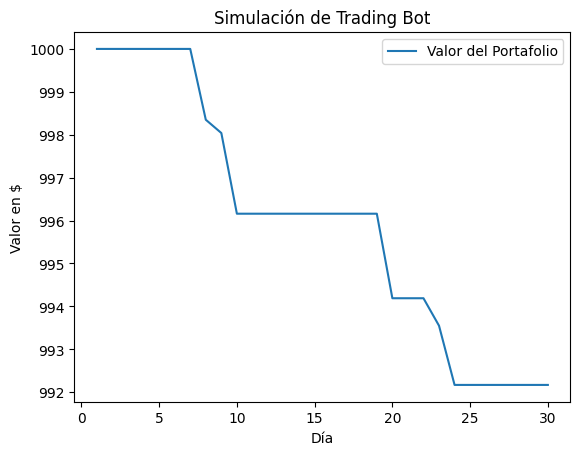

Valor final del portafolio: $992.17


In [ ]:
import random
import matplotlib.pyplot as plt

# Simulación de datos históricos de precios de acciones
def generate_stock_data(days=30, start_price=100):
    stock_data = []
    price = start_price
    for day in range(1, days + 1):
        price += random.uniform(-2, 2)  # Simula variaciones diarias en el precio
        stock_data.append({"day": day, "price": round(price, 2)})
    return stock_data

# Cálculo del momentum y decisiones de trading
def trading_simulation(stock_data, n=5, initial_cash=1000):
    cash = initial_cash
    stocks = 0
    portfolio_value = []

    for i in range(len(stock_data)):
        current_price = stock_data[i]["price"]
        if i >= n:
            avg_price = sum(stock_data[j]["price"] for j in range(i - n, i)) / n # Media móvil de n días
            momentum = current_price - avg_price
            
            if momentum > 1 and cash >= current_price:  # Señal de compra
                stocks += 1
                cash -= current_price
                print(f"Día {stock_data[i]['day']}: 📈 Comprado a ${current_price}")
            elif momentum < -1 and stocks > 0:  # Señal de venta
                cash += current_price
                stocks -= 1
                print(f"Día {stock_data[i]['day']}: 📉 Vendido a ${current_price}")
        
        portfolio_value.append(cash + stocks * current_price)
    
    return portfolio_value, cash + stocks * stock_data[-1]["price"]

# Simulación
random.seed(42)
stock_data = generate_stock_data()
portfolio_history, final_value = trading_simulation(stock_data)

# Gráfica de desempeño
plt.plot(range(1, len(portfolio_history) + 1), portfolio_history, label="Valor del Portafolio")
plt.xlabel("Día")
plt.ylabel("Valor en $")
plt.legend()
plt.title("Simulación de Trading Bot")
plt.show()

print(f"Valor final del portafolio: ${final_value:.2f}")
